## 24. Stochastic Processes

### 24.1 Introduction

A **stochastic process** $\{ X_t : t \in T \}$  is a collection of random variables.  We shall sometimes write $X(t)$ instead of $X_t$.  The variables $X_t$ take values in some set $\mathcal{X}$ called the **state space**.  The set $T$ is called the **index set** and for our purposes can be thought of as time.  The index set can be discrete, $T = \{0, 1, 2, \dots \}$ or continuous $T = [0, \infty)$ depending on the application.

Recall that if $X_1, \dots, X_n$ are random variables then we can write the joint density as

$$ f(x_1, \dots, x_n) = f(x_1) f(x_2 | x_1) \dots f(x_n | x_1, \dots, x_{n-1}) = \prod_{i=1}^n f(x_i | \text{past}_i) $$

where $\text{past}_i$ refers to all variables before $X_i$.

### 24.2 Markov Chains

The process $\{ X_n : n \in T \}$ is a **Markov Chain** if

$$ \mathbb{P}(X_n = x | X_0, \dots, X_{n-1}) = \mathbb{P}(X_n = x | X_{n-1})$$

for all $n$ and for all $x \in \mathcal{X}$.

For a Markov chain, the joint density function can be written as

$$ f(x_1, \dots, x_n) = f(x_1) f(x_2 | x_1) f(x_3 | x_2) \dots f(x_n | x_{n - 1}) $$

A Markov chain can be represented by the following DAG:

$$ X_1 \longrightarrow X_2 \longrightarrow X_3 \longrightarrow \cdots \longrightarrow X_n \longrightarrow \cdots $$

Each variable has a single parent, namely, the previous observation.

The theory of Markov chains is very rich and complex.  Our goal is to answer the following questions:

1. When does a Markov chain "settle down" into some sort of equilibrium?

2. How do we estimate the parameters of a Markov chain?

3. How can we construct Markov chains that converge to a given equilibrium and why would we want to do that?

Questions 1 and 2 will be approached this chapter, question 3 in the next chapter.

In [1]:
import numpy as np

def generate_random_walk(n, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    X = np.empty(n)
    X[0] = 0
    for i in range(1, n):
        X[i] = X[i - 1] + np.random.uniform(low=-1, high=1)
    
    return X

def generate_random_walk_bound(n, drift=-0.4, min_value=-10, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    X = np.empty(n)
    X[0] = 0
    for i in range(1, n):
        X[i] = max(X[i - 1] + drift, min_value) + np.random.uniform(low=-1, high=1)
    
    return X

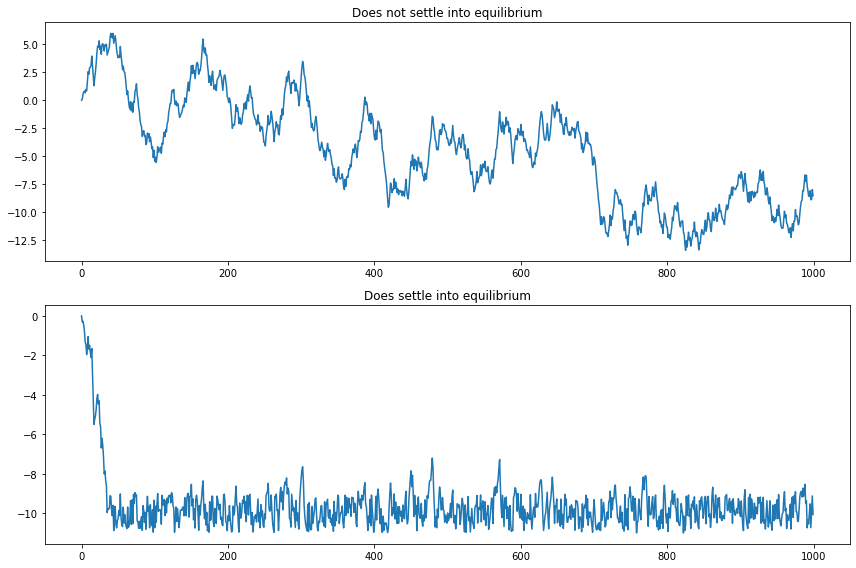

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))

A = generate_random_walk(1000, seed=0)
B = generate_random_walk_bound(1000, seed=0)

ax = plt.subplot(2, 1, 1)
ax.plot(np.arange(0, len(A)), A)
ax.set_title('Does not settle into equilibrium')

ax = plt.subplot(2, 1, 2)
ax.plot(np.arange(0, len(B)), B)
ax.set_title('Does settle into equilibrium')

plt.tight_layout()
plt.show()

#### Transition Probabilities

The key quantities of a Markov chain are the probabilities of jumping from one state into another state.

We call 

$$ \mathbb{P}(X_{n+1} = j | X_n = i) $$

the **transition probabilities**.  If the transition probabilities do not change with time, we say the chain is **homogeneous**.  In this case we define $p_{ij} = \mathbb{P}(X_{n+1} = j | X_n = i)$.  The matrix $P$ whose $(i, j)$ element is $p_{ij}$ is called the **transition matrix**.

We will only consider homogeneous chains.  Notice how each $P$ has two properties: (i) $p_{ij} \geq 0$ and (ii) $\sum_i p_{ij} = 1$.  Each row is a probability mass function.  A matrix with these properties is called a **stochastic matrix**.

Let

$$ p_{ij}(n) = \mathbb{P}(X_{m + n} = j | X_{m} = i) $$

be the probability of going from state $i$ to state $j$ in $n$ steps.  Let $P_n$ be the matrix whose $(i, j)$ element is $p_{ij}(n)$.  These are called the **$n$-step transition probabilities**.

**Theorem 24.9 (The Chapman-Kolmogorov equations)**.  The $n$-step probabilities satisfy

$$ p_{ij}(m + n) = \sum_k p_{ij}(m) p_{kj}(n) $$

**Proof**.  Recall that, in general,

$$ \mathbb{P}(X = x, Y = y) = \mathbb{P}(X = x) \mathbb{P}(Y = y | X = x) $$

This fact is true when conditioned in another variable,

$$ \mathbb{P}(X = x, Y = y | Z = z) = \mathbb{P}(X = x | Z = z) \mathbb{P}(Y = y | X = x, Z = z) $$

Also, recall the law of total probability:

$$ \mathbb{P}(X = x) = \sum_y \mathbb{P}(X = x, Y = y) $$

Using these facts and the Markov property we have:

$$
\begin{align}
p_{ij}(m + n) &= \mathbb{P}(X_{m + n} = j | X_0 = i) \\
&= \sum_k \mathbb{P}(X_{m + n} = j, X_m = k | X_0 = i) \\
&= \sum_k \mathbb{P}(X_{m + n} = j | X_m = k, X_0 = i) \mathbb{P}(X_m = k | X_0 = i) \\
&= \sum_k \mathbb{P}(X_{m + n} = j | X_m = k) \mathbb{P}(X_m = k | X_0 = i) \\
&= \sum_k p_{ik}(m) p_{kj}(n)
\end{align}
$$

Note that this definition is equivalent to matrix multiplication; hence we have shown that

$$ P_{m + n} = P_m P_n $$

By definition, $P_1 = P$.  Using the above theorem, we get

$$ P_n = P^n \equiv \underbrace{P \times P \times \cdots \times P}_{\text{multiply matrix } n \text{ times}} $$

Let $\mu_n = (\mu_n(1), \dots, \mu_n(N))$ be a row vector where

$$ \mu_n(i) = \mathbb{P}(X_n = i) $$

is the marginal probability that the chain is in state $i$ at time $n$.  In particular, $\mu_0$ is called the **initial distribution**.  To simulate a Markov chain, all you need to know is $\mu_0$ and $P$.  The simulation would look like this:

1. Draw $X_0 \sim \mu_0$.  Thus, $\mathbb{P}(X_0 = i) = \mu_0(i)$.
2. Suppose the outcome of step 1 is $i$.  Draw $X_1 \sim P$. In other words, $\mathbb{P}(X_1 = j | X_0 = i) = p_{ij}$.
3. Suppose the outcome of step 2 is $j$.  Draw $X_2 \sim P$. In other words, $\mathbb{P}(X_2 = k | X_1 = j) = p_{jk}$.

and so on.

It might be difficult to understand the meaning of $\mu_n$.  Imagine simulating the chain many times.  Collect all of the outcomes at time $n$ from all the chains.  This histogram would look approximately like $\mu_n$.  A consequence of the previous theorem is the following:

**Lemma 24.10**.  The marginal probabilities are given by

$$ \mu_n = \mu_0 P^n $$

**Proof**.

$$ \mu_n(j) = \mathbb{P}(X_n = j) = \sum_i \mathbb{P}(X_n = j | X_0 = i) \mathbb{P}(X_0 = i) = \sum_i \mu_0(i) p_{ij}(n) = \mu_0 P^n $$

**Summary**

1.  Transition matrix:  $P(i, j) = \mathbb{P}(X_{n+1} = j | X_n = i)$
2.  $n$-step matrix: $P_n(i, j) = \mathbb{P}(X_{m+n} = j | X_m = i)$
3.  $P_n = P^n$
4.  Marginal probabilities:  $\mu_n(i) = \mathbb{P}(X_n = i)$
5.  $\mu_n = \mu_0 P^n$

#### States

The states of a Markov chain can be classified according to various properties.

We say that $i$ **reaches** $j$ (or $j$ is **accessible** from $i$) if $p_{ij}(n) > 0$ for some $n$, and we write $i \rightarrow j$.  If $i \rightarrow j$ and $j \rightarrow i$ then we write $i \leftrightarrow j$ and we say that $i$ and $j$ **communicate**.

**Theorem 24.12**.  The communication relation satisfies the following properties:

1.  $i \leftrightarrow i$.
2.  If $i \leftrightarrow j$ then $j \leftrightarrow i$.
3.  If $i \leftrightarrow j$ and $j \leftrightarrow k$ then $i \leftrightarrow k$.
4.  The set of states $\mathcal{X}$ can be written as a disjoint union of **classes** $\mathcal{X} = \mathcal{X}_1 \cup \mathcal{X}_2 \cup \cdots$  where two states $i$ and $j$ communicate with each other if and only if they are in the same class.

If all states communicate with each other then the chain is called **irreducible**.  A set of states is **closed** if once you enter that set states you never leave.  A closet set consisting of a single state is called an **absorbing state**.

Suppose we start a chain in state $i$.  Will the chain ever return to state $i$?  If so, that state is called persistent or recurrent.

State $i$ is **recurrent** or **persistent** if 

$$ \mathbb{P}(X_n = i \text{ for some } n \geq 1 | X_0 = i) = 1 $$

Otherwise, state $i$ is **transient**.

**Theorem 24.15**.  A state $i$ is recurrent if and only if

$$ \sum_n p_{ii}(n) = \infty $$

A state $i$ is transient if and only if

$$ \sum_n p_{ii}(n) < \infty $$

**Proof**.  Define

$$ 
I_n = \begin{cases}
1 & \text{if } X_n = i \\
0 & \text{if } X_n \neq i
\end{cases}
$$

The number of times that the chain is in state $i$ is $Y = \sum_{n=0}^\infty I_n$.  The mean of $Y$, given that the chain starts in state $i$, is

$$
\begin{align}
\mathbb{E}(Y | X_0 = i) &= \sum_{n=0}^\infty \mathbb{E}(I_n | X_0 = i) \\
&= \sum_{n=0}^\infty \mathbb{P}(X_n = i | X_0 = i) \\
&= \sum_{n=0}^\infty p_{ii}(n)
\end{align}
$$

Define $a_i = \mathbb{P}(X_n = i \text{ for some } n \geq  1 | X_0 = i)$.  If $i$ is recurrent, $a_i = 1$.  Thus, the chain will eventually return to $i$.  Once it does, we argue again that since $a_i = 1$, the chain will return to state $i$ again.  By repeating this argument, we conclude that $\mathbb{E}(Y | X_0 = i) = \infty$.

If $i$ is transient, then $a_i < 1$.  When the chain is in state $i$, there is a probability $1 - a_i > 0$ that it will never return to state $i$.  Thus, the probability that the chain is in state $i$ exactly $n$ times is $a_i^{n - 1}(1 - a_i)$.  This is a geometric distribution that has finite mean.

**Theorem 24.16**.  Facts about recurrence:

1.  If a state $i$ is recurrent and $i \leftrightarrow j$ then $j$ is recurrent.
2.  If a state $i$ is transient and $i \leftrightarrow j$ then $j$ is transient.
3.  A finite Markov chain must have at least one recurrent state.
4.  The states of a finite, irreducible Markov chain are all recurrent.

**Theorem 24.17 (Decomposition Theorem)**.  The state space $\mathcal{X}$ can be written as the disjoint union

$$ \mathcal{X} = \mathcal{X}_{T} \cup \mathcal{X}_{1} \cup \mathcal{X}_{2} \cup \cdots $$

where the $\mathcal{X}_T$ are the transient states and each $\mathcal{X}_i$ is a closed, irreducible set of recurrent states.

#### Convergence of Markov Chains

Suppose that $X_0 = i$.  Define the **recurrence time**

$$ T_{ij} = \min \{ n > 0 : X_n = j \} $$

assuming $X_n$ ever returns to the state $i$, otherwise define $T_{ij} = \infty$.  The **mean recurrence time** of a recurrent state $i$ is

$$ m_i = \mathbb{E}(T_{ii}) = \sum_n n f_{ii}(n) $$

where

$$ f_{ij}(n) = \mathbb{P}(X_1 \neq j, X_2 \neq j, \dots, X_{n-1} \neq j, X_n \neq j | X_0 = i) $$

A recurrent state is **null** if $m_i = \infty$, otherwise it is called **non-null** or **positive**.

**Lemma 24.18**.  If a state is null and recurrent, then $p_{ii}^n \rightarrow 0$.

**Lemma 24.19**.  In a finite state Markov chain, all recurrent states are positive.

Consider a three state chain with transition matrix

$$
\begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix}
$$

Suppose we start the chain in state 1.  Then we will be in state 3 at times $3, 6, 9, \dots$.  This is an example of a periodic chain.  Formally, the **period** of state $i$ is $d$ is $p_{ii}(n) = 0$ whenever $n$ is not divisible by $d$ and $d$ is the largest integer with this property.  Thus, $d = \text{gcd} \{ n : p_{ii}(n) = 0 \}$, where gcd means "greatest common divisor".  State $i$ is **periodic** if $d(i) > 1$ and **aperiodic** if $d(i) = 1$.

**Lemma 24.20**.  If a state $i$ has period $d$ and $i \leftrightarrow j$ then $j$ has period $d$.

A state is **ergodic** if it is recurrent, non-null and aperiodic.  A chain is ergodic if all its states are ergodic.

Let $\pi = (\pi_i : i \in \mathcal{X})$ be a vector of non-negative numbers that sum to one.  Thus $\pi$ can be thought of as a probability mass function.

We say that $\pi$ is a **stationary** (or **invariant**) distribution if $\pi = \pi P$.

Here is the intuition.  Draw $X_0$ from distribution $\pi$ and suppose that $pi$ is a stationary distribution.  Now draw $X_1$ according to the transition probability of the chain.  The distribution of $X_1$ is then $\mu_1 = \mu_0 P = \pi P = \pi$.  Continuing this way, the distribution of $X_n$ is $\mu_n = \mu_0 P^n = \pi P^n = \pi$.  In other words:  if at any time the chain has distribution $\pi$, then it will continue to have distribution $\pi$ forever.

We say that a chain has **limiting distribution** if

$$ P^n \rightarrow \begin{bmatrix}
\pi \\ \pi \\ \vdots \\ \pi
\end{bmatrix}$$

for some $\pi$.  In other words, $\pi_j = \lim_{n \rightarrow \infty} P_{ij}^n$ exists and is independent of $i$.

**Theorem 24.24**.  An irreducible, ergodic Markov chain has a unique stationary distribution $\pi$.  The limiting distribution exists and is equal to $\pi$.  If $g$ is any bounded function, then, with probabiity 1,

$$ \lim_{N \rightarrow \infty} \frac{1}{N} \sum_{n=1}^N g(X_n) = \mathbb{E}_\pi(g) \equiv \sum_j g(j) \pi_j $$

The last statement of the theorem is the law of large numbers for Markov chains.  It says that sample averages converge to their expectations.  Finally, there is a special condition which will be useful later.  We say that $\pi$ satisfies **detailed balance** if

$$ \pi_i p_{ij} = p_{ji} \pi_j $$

Detailed balance guarantees that $\pi$ is a stationary distribution.

**Theorem 24.25**.  If $\pi$ satisfies detailed balance then $\pi$ is a stationary distribution.

**Proof**.  We need to show that $\pi P = \pi$.  The $j$-th element of $\pi P$ is $\sum_i \pi_i p_{ij} = \sum_i p_{ji}\pi_j  = \pi_j \sum_i p_{ji} = \pi_j$.

The importance of detailed balance will become clear when we discuss Markov chain Monte Carlo methods.

**Warning**: Just because a chain has a stationary distribution does not mean it converges.